<a href="https://colab.research.google.com/github/JunaidRaza78/RI-Software-Predictive-models/blob/main/Competitive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate mock data
num_competitors = 5
num_months = 12

data = {
    'Competitor_ID': np.repeat(np.arange(1, num_competitors + 1), num_months),
    'Month': np.tile(np.arange(1, num_months + 1), num_competitors),
    'Sales': np.random.randint(100000, 500000, size=num_competitors * num_months),
    #'Market_Share': np.random.uniform(5, 25, size=num_competitors * num_months),
    'Average_Price': np.random.uniform(50, 200, size=num_competitors * num_months),
    'Product': np.repeat(['A', 'B', 'C', 'D', 'E'], num_months),
    'Product_Quality': np.tile(np.random.randint(1, 11, size=num_months), num_competitors),
    'Rating': np.tile(np.random.uniform(1, 5, size=num_months), num_competitors),
    #'Opportunity': np.random.randint(0, 2, size=num_competitors * num_months),  # Binary opportunity column (0 or 1)
    #'Competitive_Advantage': np.random.randint(0, 2, size=num_competitors * num_months)  # Binary competitive advantage column (0 or 1)
}

df = pd.DataFrame(data)

# Display the generated DataFrame
df



,Competitor_ID,Month,Sales,Average_Price,Product,Product_Quality,Rating
0,1,1,221958,107.812475,A,9,4.771414
1,1,2,246867,52.394938,A,10,3.395462
2,1,3,231932,84.634074,A,10,3.779140
3,1,4,465838,86.153820,A,3,4.521871
4,1,5,359178,152.489528,A,7,3.497416
5,1,6,219879,141.499499,A,1,2.182535
6,1,7,210268,174.979237,A,4,1.421977
7,1,8,307892,76.004698,A,4,2.826138
8,1,9,154886,108.659091,A,5,1.873762
9,1,10,237337,77.335413,A,7,2.666040


import pandas as pd

# Assuming your data is stored in a DataFrame named df
total_sales = df.groupby(['Competitor_ID', 'Month'])['Sales'].sum().reset_index()

total_market_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Merge DataFrames
df = pd.merge(total_sales, total_market_sales, on='Month', suffixes=('_competitor', '_total'))

# Calculate Market Share
df['Market_Share'] = df['Sales_competitor'] / df['Sales_total']
df
**Summary Statistics for Competitors on Sales**

In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame named df

# Calculate Total Sales for Each Competitor in Each Month
total_sales = df.groupby(['Competitor_ID', 'Month'])['Sales'].sum().reset_index()

# Calculate Total Market Sales for Each Month
total_market_sales = df.groupby('Month')['Sales'].sum().reset_index().rename(columns={'Sales': 'Sales_total'})

# Merge DataFrames
df = pd.merge(df, total_sales, on=['Competitor_ID', 'Month'], how='left', suffixes=('_original', '_competitor'))

# Merge Total Market Sales DataFrame
df = pd.merge(df, total_market_sales, on='Month', how='left')

# Convert columns to numeric
df['Sales_original'] = pd.to_numeric(df['Sales_original'])
df['Sales_total'] = pd.to_numeric(df['Sales_total'])

# Calculate Market Share
df['Market_Share'] = (df['Sales_original'] / df['Sales_total']) * 100

# Drop unnecessary columns
df.drop(['Sales_original', 'Sales_total'], axis=1, inplace=True)

# Display the updated DataFrame
df


,Competitor_ID,Month,Average_Price,Product,Product_Quality,Rating,Sales_competitor,Market_Share
0,1,1,107.812475,A,9,4.771414,221958,12.775811
1,1,2,52.394938,A,10,3.395462,246867,16.528476
2,1,3,84.634074,A,10,3.779140,231932,18.398467
3,1,4,86.153820,A,3,4.521871,465838,30.900417
4,1,5,152.489528,A,7,3.497416,359178,32.018720
5,1,6,141.499499,A,1,2.182535,219879,14.457696
6,1,7,174.979237,A,4,1.421977,210268,14.435059
7,1,8,76.004698,A,4,2.826138,307892,17.565834
8,1,9,108.659091,A,5,1.873762,154886,9.632885
9,1,10,77.335413,A,7,2.666040,237337,15.341213


Summary Statistics for Competitors:
   Competitor_ID  Sales_competitor  Market_Share  Average_Price  Sales_Rank
0              1           3318404     18.287914     111.586697           4
1              2           4027045     21.359871     131.588329           2
2              3           4291631     23.125344     123.275573           1
3              4           3015441     15.941742     131.264060           5
4              5           3932163     21.285128     131.877255           3


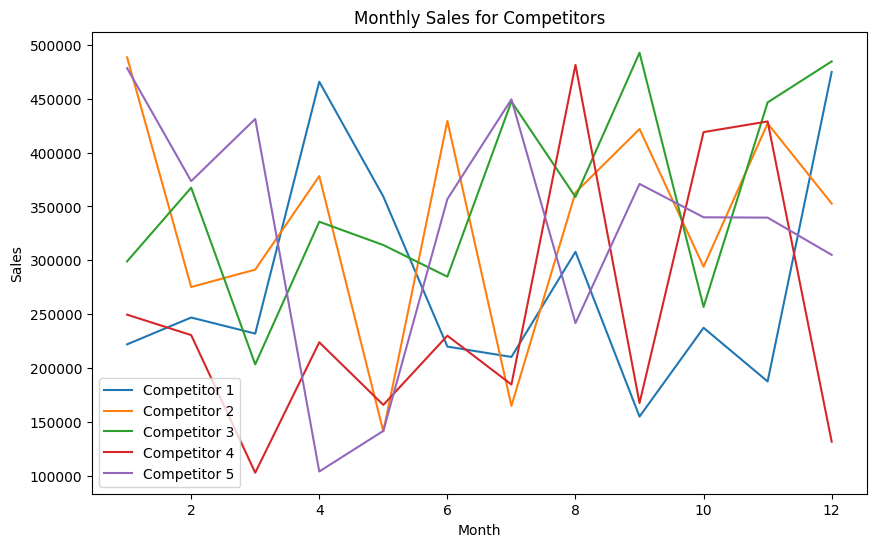

In [ ]:
import pandas as pd

def analyze_sales_strategies(df):
    """
    Analyze competitors' sales strategies.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for each competitor
    """
    # Calculate total sales, average market share, and average price for each competitor
    summary_df = df.groupby('Competitor_ID').agg({
        'Sales_competitor': 'sum',
        'Market_Share': 'mean',
        'Average_Price': 'mean'
    }).reset_index()

    # Rank competitors based on total sales
    summary_df['Sales_Rank'] = summary_df['Sales_competitor'].rank(ascending=False).astype(int)

    # Display summary statistics
    print("Summary Statistics for Competitors:")
    print(summary_df)

    # Visualize data (you can customize this part based on your preferences)
    import matplotlib.pyplot as plt

    # Plot total sales for each competitor
    plt.figure(figsize=(10, 6))
    for competitor_id, data in df.groupby('Competitor_ID'):
        plt.plot(data['Month'], data['Sales_competitor'], label=f'Competitor {competitor_id}')

    plt.title('Monthly Sales for Competitors')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return summary_df

# Example usage:
summary_statistics = analyze_sales_strategies(df)


In [ ]:
# Summary Statistics for Competitors on Market_Share with ID
import pandas as pd

def analyze_sales_strategies(df):
    """
    Analyze competitors' sales strategies.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales_competitor', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for each competitor
    - sales_strategies_dict: Nested dictionary with sales strategies data for each competitor
    """

    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')




    # Calculate total sales, average market share, and average price for each competitor
    summary_df = df.groupby('Competitor_ID').agg({
        'Sales_competitor': 'sum',
    }).reset_index()

    # Rank competitors based on total sales
    summary_df['Sales_Rank'] = summary_df['Sales_competitor'].rank(ascending=False).astype(int)

    # Display summary statistics
    #print("Summary Statistics for Competitors:")
    #print(summary_df)

    # Create a nested dictionary for sales strategies
    sales_strategies_dict = {}

    #for competitor_id, data in df.groupby('Competitor_ID'):
    #    key = data['Competitor_ID'].iloc[0]
    #    #sales_strategies_dict[data['Competitor_ID'].iloc[0]] = []
    #    sales_strategies_dict[key] = []

     #   for idx, row in data.iterrows():
     #       sales_strategies_dict[data['Competitor_ID'].iloc[0]].append({
     #           'label': row['Month'],
     #           f'Value': row['Average_Price']
     #       })

        # Create a nested dictionary for sales strategies
    for competitor_id, data in df.groupby('Competitor_ID'):
        key = f'Competitor_ID_{competitor_id}_Market_Share'
        sales_strategies_dict[key] = []

        for idx, row in data.iterrows():
            sales_strategies_dict[key].append({
                'label': row['Month'],
                'value': row['Market_Share'],
            })

    return sales_strategies_dict

    # Display the nested dictionary
    print("Nested Dictionary for Sales Strategies:")
    print(sales_strategies_dict)

    return sales_strategies_dict

sales_strategies_dict = analyze_sales_strategies(df)
print(sales_strategies_dict)

{'Competitor_ID_1_Market_Share': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 12.77581115850184}, {'label': Timestamp('1900-02-01 00:00:00'), 'value': 16.52847576235985}, {'label': Timestamp('1900-03-01 00:00:00'), 'value': 18.398467402556708}, {'label': Timestamp('1900-04-01 00:00:00'), 'value': 30.900416969034445}, {'label': Timestamp('1900-05-01 00:00:00'), 'value': 32.0187203316173}, {'label': Timestamp('1900-06-01 00:00:00'), 'value': 14.457695858352334}, {'label': Timestamp('1900-07-01 00:00:00'), 'value': 14.435059122039092}, {'label': Timestamp('1900-08-01 00:00:00'), 'value': 17.56583365139786}, {'label': Timestamp('1900-09-01 00:00:00'), 'value': 9.63288487755366}, {'label': Timestamp('1900-10-01 00:00:00'), 'value': 15.341212820487959}, {'label': Timestamp('1900-11-01 00:00:00'), 'value': 10.247108235210533}, {'label': Timestamp('1900-12-01 00:00:00'), 'value': 27.153282751609197}], 'Competitor_ID_2_Market_Share': [{'label': Timestamp('1900-01-01 00:00:00'), 'value'

In [ ]:
# Summary Statistics for Competitors on Market Share
import pandas as pd

def analyze_sales_strategies(df):
    """
    Analyze competitors' sales strategies.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales_competitor', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for each competitor
    - sales_strategies_dict: Nested dictionary with sales strategies data for each competitor
    """

    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')




    # Calculate total sales, average market share, and average price for each competitor
    summary_df = df.groupby('Competitor_ID').agg({
        'Sales_competitor': 'sum',
    }).reset_index()

    # Rank competitors based on total sales
    summary_df['Sales_Rank'] = summary_df['Sales_competitor'].rank(ascending=False).astype(int)

    # Display summary statistics
    #print("Summary Statistics for Competitors:")
    #print(summary_df)

    # Create a nested dictionary for sales strategies
    sales_strategies_dict = {}

    for competitor_id, data in df.groupby('Competitor_ID'):
        sales_strategies_dict[data['Sales_competitor'].iloc[0]] = []

        for idx, row in data.iterrows():
            sales_strategies_dict[data['Sales_competitor'].iloc[0]].append({
                'Time': row['Month'],
                f'Market_Share of Competitor_ID is {row["Competitor_ID"]}': row['Market_Share']
            })

    # Display the nested dictionary
    print("Nested Dictionary for Sales Strategies:")
    print(sales_strategies_dict)

    return summary_df, sales_strategies_dict


summary_statistics, sales_strategies_dict = analyze_sales_strategies(df)





Nested Dictionary for Sales Strategies:
{221958: [{'Time': Timestamp('1900-01-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 12.77581115850184}, {'Time': Timestamp('1900-02-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 16.52847576235985}, {'Time': Timestamp('1900-03-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 18.398467402556708}, {'Time': Timestamp('1900-04-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 30.900416969034445}, {'Time': Timestamp('1900-05-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 32.0187203316173}, {'Time': Timestamp('1900-06-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 14.457695858352334}, {'Time': Timestamp('1900-07-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 14.435059122039092}, {'Time': Timestamp('1900-08-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 17.56583365139786}, {'Time': Timestamp('1900-09-01 00:00:00'), 'Market_Share of Competitor_ID is 1': 9.63288487755366}, {'Time': Timestamp('1900-10-01 00:00:00

In [ ]:
# Summary Statistics for Competitors on Average price with ID
import pandas as pd

def analyze_sales_strategies(df):
    """
    Analyze competitors' sales strategies.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales_competitor', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for each competitor
    - sales_strategies_dict: Nested dictionary with sales strategies data for each competitor
    """

    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')




    # Calculate total sales, average market share, and average price for each competitor
    summary_df = df.groupby('Competitor_ID').agg({
        'Sales_competitor': 'sum',
    }).reset_index()

    # Rank competitors based on total sales
    summary_df['Sales_Rank'] = summary_df['Sales_competitor'].rank(ascending=False).astype(int)

    # Display summary statistics
    #print("Summary Statistics for Competitors:")
    #print(summary_df)

    # Create a nested dictionary for sales strategies
    sales_strategies_dict = {}

    #for competitor_id, data in df.groupby('Competitor_ID'):
    #    key = data['Competitor_ID'].iloc[0]
    #    #sales_strategies_dict[data['Competitor_ID'].iloc[0]] = []
    #    sales_strategies_dict[key] = []

     #   for idx, row in data.iterrows():
     #       sales_strategies_dict[data['Competitor_ID'].iloc[0]].append({
     #           'label': row['Month'],
     #           f'Value': row['Average_Price']
     #       })

        # Create a nested dictionary for sales strategies
    for competitor_id, data in df.groupby('Competitor_ID'):
        key = f'Competitor_ID_{competitor_id}_Average_Price'
        sales_strategies_dict[key] = []

        for idx, row in data.iterrows():
            sales_strategies_dict[key].append({
                'label': row['Month'],
                'value': row['Average_Price'],
            })

    return sales_strategies_dict

    # Display the nested dictionary
    print("Nested Dictionary for Sales Strategies:")
    print(sales_strategies_dict)

    return sales_strategies_dict

sales_strategies_dict = analyze_sales_strategies(df)
print(sales_strategies_dict)


{'Competitor_ID_1_Average_Price': [{'label': Timestamp('1900-01-01 00:00:00'), 'value': 107.81247538098742}, {'label': Timestamp('1900-02-01 00:00:00'), 'value': 52.39493783303213}, {'label': Timestamp('1900-03-01 00:00:00'), 'value': 84.63407384332234}, {'label': Timestamp('1900-04-01 00:00:00'), 'value': 86.15381990390176}, {'label': Timestamp('1900-05-01 00:00:00'), 'value': 152.48952782381872}, {'label': Timestamp('1900-06-01 00:00:00'), 'value': 141.49949866739314}, {'label': Timestamp('1900-07-01 00:00:00'), 'value': 174.97923676042467}, {'label': Timestamp('1900-08-01 00:00:00'), 'value': 76.00469802616581}, {'label': Timestamp('1900-09-01 00:00:00'), 'value': 108.65909113598612}, {'label': Timestamp('1900-10-01 00:00:00'), 'value': 77.33541316820936}, {'label': Timestamp('1900-11-01 00:00:00'), 'value': 163.30421154764787}, {'label': Timestamp('1900-12-01 00:00:00'), 'value': 113.77338117368672}], 'Competitor_ID_2_Average_Price': [{'label': Timestamp('1900-01-01 00:00:00'), 'va

In [ ]:
# Summary Statistics for Competitors on Average Price with Sales
import pandas as pd

def analyze_sales_strategies(df):
    """
    Analyze competitors' sales strategies.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales_competitor', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for each competitor
    - sales_strategies_dict: Nested dictionary with sales strategies data for each competitor
    """

    # Convert 'Month' to timestamps
    df['Month'] = pd.to_datetime(df['Month'], format='%m', errors='coerce')


    # Calculate total sales, average market share, and average price for each competitor
    summary_df = df.groupby('Competitor_ID').agg({
        'Sales_competitor': 'sum',
    }).reset_index()

    # Rank competitors based on total sales
    summary_df['Sales_Rank'] = summary_df['Sales_competitor'].rank(ascending=False).astype(int)

    # Display summary statistics
    #print("Summary Statistics for Competitors:")
    #print(summary_df)

    # Create a nested dictionary for sales strategies
    sales_strategies_dict = {}

    for competitor_id, data in df.groupby('Competitor_ID'):
        sales_strategies_dict[data['Sales_competitor'].iloc[0]] = []

        for idx, row in data.iterrows():
            sales_strategies_dict[data['Sales_competitor'].iloc[0]].append({
                'Time': row['Month'],
                f'Average_Price of Competitor_ID is {row["Competitor_ID"]}': row['Average_Price']
            })

    # Display the nested dictionary
    print("Nested Dictionary for Sales Strategies:")
    print(sales_strategies_dict)

    return summary_df, sales_strategies_dict


summary_statistics, sales_strategies_dict = analyze_sales_strategies(df)




Nested Dictionary for Sales Strategies:
{221958: [{'Time': Timestamp('1900-01-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 107.81247538098742}, {'Time': Timestamp('1900-02-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 52.39493783303213}, {'Time': Timestamp('1900-03-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 84.63407384332234}, {'Time': Timestamp('1900-04-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 86.15381990390176}, {'Time': Timestamp('1900-05-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 152.48952782381872}, {'Time': Timestamp('1900-06-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 141.49949866739314}, {'Time': Timestamp('1900-07-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 174.97923676042467}, {'Time': Timestamp('1900-08-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 76.00469802616581}, {'Time': Timestamp('1900-09-01 00:00:00'), 'Average_Price of Competitor_ID is 1': 108.65909113598612}, {'Time': Timestamp('1900-10

**Summary Statistics for Competitors on Sales**

Summary Statistics for Competitors' Pricing:
   Competitor_ID  Average_Price
0              1     111.586697
1              2     131.588329
2              3     123.275573
3              4     131.264060
4              5     131.877255


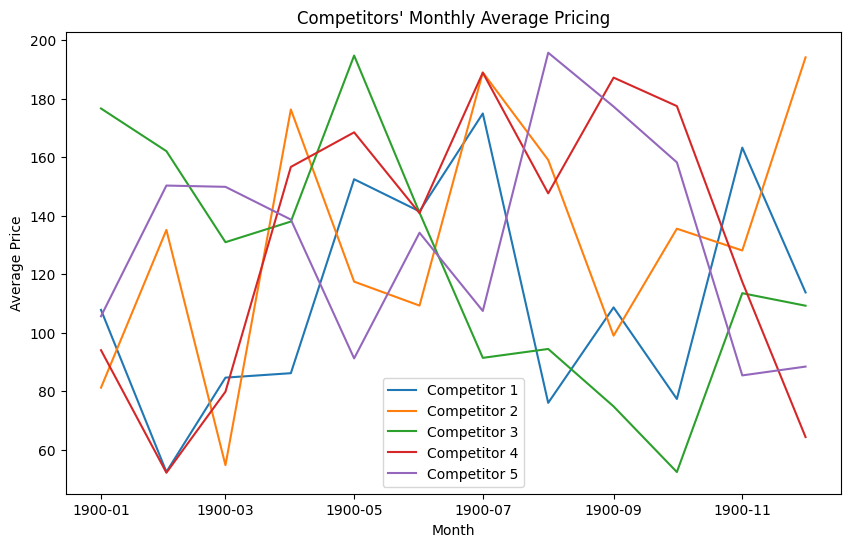

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_pricing(df):
    """
    Analyze competitors' pricing.

    Parameters:
    - df: DataFrame containing mock data with columns 'Competitor_ID', 'Month', 'Sales', 'Market_Share', 'Average_Price'

    Returns:
    - summary_df: DataFrame with summary statistics for pricing
    """
    # Calculate average price for each competitor
    summary_df = df.groupby('Competitor_ID')['Average_Price'].mean().reset_index()

    # Display summary statistics
    print("Summary Statistics for Competitors' Pricing:")
    print(summary_df)

    # Visualize average pricing for each competitor
    plt.figure(figsize=(10, 6))
    for competitor_id, data in df.groupby('Competitor_ID'):
        plt.plot(data['Month'], data['Average_Price'], label=f'Competitor {competitor_id}')

    plt.title("Competitors' Monthly Average Pricing")
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

    return summary_df

# Example usage:
pricing_statistics = analyze_pricing(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def competitive_advantage_analysis(df):
    """
    Analyze competitors' data to identify opportunities for differentiation and gain a competitive advantage.

    Parameters:
    - df: DataFrame containing competitors' data

    Returns:
    - opportunities_df: DataFrame with identified opportunities
    """
    # Your analysis code goes here
    # ...

    # Example: Calculate total sales for each competitor
    total_sales = df.groupby('Competitor_ID')['Sales_competitor'].sum().reset_index()

    # Example: Visualize total sales for each competitor
    plt.figure(figsize=(10, 6))
    for competitor_id, data in df.groupby('Competitor_ID'):
        plt.plot(data['Month'], data['Sales_competitor'], label=f'Competitor {competitor_id}')

    plt.title('Competitors\' Monthly Sales')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    # Example: Identify competitor with the highest total sales
    best_performer = total_sales.loc[total_sales['Sales_competitor'].idxmax()]

    # Print information about the best-performing competitor
    print("Best-Performing Competitor:")
    print(best_performer)

    # Example: Identify opportunities based on analysis
    # ...

    # Return DataFrame with identified opportunities (customize based on your analysis)
    opportunities_df = pd.DataFrame({
        'Opportunity_ID': [1, 2, 3],
        'Opportunity_Description': ['Improve Marketing Strategy', 'Optimize Pricing Model', 'Explore New Technologies']
    })

    return opportunities_df



In [ ]:
import pandas as pd


# Calculate mean values for each Competitor_ID
competitor_means = df.groupby('Competitor_ID').agg({
    'Average_Price': 'mean',
    'Product': lambda x: x.value_counts().idxmax(),
    'Product_Quality': 'mean',
    'Rating': 'mean',
    'Sales_competitor': 'mean',
    'Market_Share': 'mean'
}).reset_index()

# Display the mean values for each Competitor_ID
competitor_means



,Competitor_ID,Average_Price,Product,Product_Quality,Rating,Sales_competitor,Market_Share
0,1,111.586697,A,5.916667,3.147188,276533.666667,18.287914
1,2,131.588329,B,5.916667,3.147188,335587.083333,21.359871
2,3,123.275573,C,5.916667,3.147188,357635.916667,23.125344
3,4,131.264060,D,5.916667,3.147188,251286.750000,15.941742
4,5,131.877255,E,5.916667,3.147188,327680.250000,21.285128


In [ ]:
import pandas as pd

# Assuming your data is stored in a DataFrame named df
# If not, replace df with the actual name of your DataFrame

# Calculate mean values for each Competitor_ID
competitor_means = df.groupby('Competitor_ID').agg({
    'Average_Price': 'mean',
    'Rating': 'mean'
}).reset_index()

# Define conditions for differentiation opportunities
conditions = (
    (competitor_means['Average_Price'] > df['Average_Price'].mean()) &
    (competitor_means['Rating'] > df['Rating'].mean())
)

# Add the 'Opportunity' column
competitor_means['Opportunity'] = conditions.astype(int)

# Merge the 'Opportunity' column back to the original DataFrame
df = pd.merge(df, competitor_means[['Competitor_ID', 'Opportunity']], on='Competitor_ID', how='left')

# Fill NaN values with 0 (no opportunity)
df['Opportunity'].fillna(0, inplace=True)

# Display the updated DataFrame
df


,Competitor_ID,Month,Average_Price,Product,Product_Quality,Rating,Sales_competitor,Market_Share,Opportunity
0,1,1900-01-01,107.812475,A,9,4.771414,221958,12.775811,0
1,1,1900-02-01,52.394938,A,10,3.395462,246867,16.528476,0
2,1,1900-03-01,84.634074,A,10,3.779140,231932,18.398467,0
3,1,1900-04-01,86.153820,A,3,4.521871,465838,30.900417,0
4,1,1900-05-01,152.489528,A,7,3.497416,359178,32.018720,0
5,1,1900-06-01,141.499499,A,1,2.182535,219879,14.457696,0
6,1,1900-07-01,174.979237,A,4,1.421977,210268,14.435059,0
7,1,1900-08-01,76.004698,A,4,2.826138,307892,17.565834,0
8,1,1900-09-01,108.659091,A,5,1.873762,154886,9.632885,0
9,1,1900-10-01,77.335413,A,7,2.666040,237337,15.341213,0


In [ ]:
import pandas as pd


# Calculate average market share for each Competitor_ID
competitor_avg_share = df.groupby('Competitor_ID')['Market_Share'].mean().reset_index()

# Merge the average market share back to the original DataFrame
df = pd.merge(df, competitor_avg_share, on='Competitor_ID', how='left', suffixes=('_original', '_average'))

# Identify Competitor_ID with a recent gain in competitive advantage
df['Competitive_Advantage'] = (df['Market_Share_original'] > df['Market_Share_average']).astype(int)

# Display the updated DataFrame
df


,Competitor_ID,Month,Average_Price,Product,Product_Quality,Rating,Sales_competitor,Market_Share_original,Opportunity,Market_Share_average,Competitive_Advantage
0,1,1900-01-01,107.812475,A,9,4.771414,221958,12.775811,0,18.287914,0
1,1,1900-02-01,52.394938,A,10,3.395462,246867,16.528476,0,18.287914,0
2,1,1900-03-01,84.634074,A,10,3.779140,231932,18.398467,0,18.287914,1
3,1,1900-04-01,86.153820,A,3,4.521871,465838,30.900417,0,18.287914,1
4,1,1900-05-01,152.489528,A,7,3.497416,359178,32.018720,0,18.287914,1
5,1,1900-06-01,141.499499,A,1,2.182535,219879,14.457696,0,18.287914,0
6,1,1900-07-01,174.979237,A,4,1.421977,210268,14.435059,0,18.287914,0
7,1,1900-08-01,76.004698,A,4,2.826138,307892,17.565834,0,18.287914,0
8,1,1900-09-01,108.659091,A,5,1.873762,154886,9.632885,0,18.287914,0
9,1,1900-10-01,77.335413,A,7,2.666040,237337,15.341213,0,18.287914,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Features for classification (you can adjust these based on your criteria)
features = ['Average_Price', 'Rating', 'Product_Quality', 'Sales_competitor', 'Rating']

# Target variable for opportunity detection
target_opportunity = 'Opportunity'

# Target variable for competitive advantage detection
target_advantage = 'Competitive_Advantage'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Train a decision tree classifier for opportunity detection
clf_opportunity = DecisionTreeClassifier(random_state=42)
clf_opportunity.fit(train_data[features], train_data[target_opportunity])

# Predict on the test set for opportunity detection
test_data['Opportunity_Prediction'] = clf_opportunity.predict(test_data[features])

# Calculate accuracy for opportunity detection
accuracy_opportunity = accuracy_score(test_data[target_opportunity], test_data['Opportunity_Prediction'])

# Train a decision tree classifier for competitive advantage detection
clf_advantage = DecisionTreeClassifier(random_state=42)
clf_advantage.fit(train_data[features], train_data[target_advantage])

# Predict on the test set for competitive advantage detection
test_data['Advantage_Prediction'] = clf_advantage.predict(test_data[features])

# Calculate accuracy for competitive advantage detection
accuracy_advantage = accuracy_score(test_data[target_advantage], test_data['Advantage_Prediction'])

# Display the accuracy scores
print(f"Accuracy for Opportunity Detection: {accuracy_opportunity:.2%}")
print(f"Accuracy for Competitive Advantage Detection: {accuracy_advantage:.2%}")



Accuracy for Opportunity Detection: 41.67%
Accuracy for Competitive Advantage Detection: 91.67%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
features = ['Average_Price', 'Rating','Product_Quality', 'Sales_competitor']

# Target variable for opportunity detection
target_opportunity = 'Opportunity'

# Target variable for competitive advantage detection
target_advantage = 'Competitive_Advantage'

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
# Standardize features
scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])
test_data[features] = scaler.transform(test_data[features])


In [ ]:
# Build the neural network for opportunity detection
model_opportunity = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(features),)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_opportunity.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                          loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for opportunity detection
model_opportunity.fit(train_data[features], train_data[target_opportunity],
                      epochs=20, batch_size=32, validation_split=0.2, verbose=1)


# Predict on the test set for opportunity detection
test_data['Opportunity_Prediction'] = np.round(model_opportunity.predict(test_data[features]))

# Calculate accuracy for opportunity detection
accuracy_opportunity = accuracy_score(test_data[target_opportunity], test_data['Opportunity_Prediction'])

# Display the accuracy scores
print(f"Accuracy for Opportunity Detection: {accuracy_opportunity:.2%}")



Epoch 1/20
2/2 [==============================] - 1s 260ms/step - loss: 0.7458 - accuracy: 0.4737 - val_loss: 0.6311 - val_accuracy: 0.8000
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.7218 - accuracy: 0.5000 - val_loss: 0.6317 - val_accuracy: 0.8000
Epoch 3/20
2/2 [==============================] - 0s 35ms/step - loss: 0.7185 - accuracy: 0.5263 - val_loss: 0.6336 - val_accuracy: 0.7000
Epoch 4/20
2/2 [==============================] - 0s 37ms/step - loss: 0.7347 - accuracy: 0.3947 - val_loss: 0.6358 - val_accuracy: 0.7000
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.7341 - accuracy: 0.4737 - val_loss: 0.6384 - val_accuracy: 0.8000
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.7210 - accuracy: 0.5526 - val_loss: 0.6418 - val_accuracy: 0.8000
Epoch 7/20
2/2 [==============================] - 0s 70ms/step - loss: 0.7145 - accuracy: 0.5263 - val_loss: 0.6454 - val_accuracy: 0.8000
Epoch 8/20
2/2 [==========

In [ ]:
# Build the neural network for competitive advantage detection
model_advantage = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(features),)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_advantage.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                        loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model for competitive advantage detection
model_advantage.fit(train_data[features], train_data[target_advantage],
                    epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
2/2 [==============================] - 1s 243ms/step - loss: 0.6878 - accuracy: 0.5789 - val_loss: 0.6762 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.6919 - accuracy: 0.5526 - val_loss: 0.6738 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.6867 - accuracy: 0.5000 - val_loss: 0.6717 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.6674 - accuracy: 0.6842 - val_loss: 0.6691 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.6657 - accuracy: 0.6579 - val_loss: 0.6654 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.6562 - accuracy: 0.6316 - val_loss: 0.6597 - val_accuracy: 0.6000
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.6715 - accuracy: 0.5789 - val_loss: 0.6528 - val_accuracy: 0.7000
Epoch 8/20
2/2 [==========

In [ ]:
# Predict on the test set for competitive advantage detection
test_data['Advantage_Prediction'] = np.round(model_advantage.predict(test_data[features]))


1/1 [==============================] - 0s 81ms/step


In [ ]:
# Calculate accuracy for competitive advantage detection
accuracy_advantage = accuracy_score(test_data[target_advantage], test_data['Advantage_Prediction'])

print(f"Accuracy for Competitive Advantage Detection: {accuracy_advantage:.2%}")

Accuracy for Competitive Advantage Detection: 83.33%
